In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regresion Lineaire

In [2]:
#modèle linéaire
def model(X,theta):
    return X.dot(theta)

In [3]:
#fontion coût
def cost_function (X,y,theta):
    m = len(y)
    return 1/(2*m)*np.sum(model(X,theta)-y)**2

In [4]:
#fonciton calcul du gradient
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X, theta)-y)

In [5]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    #création d'un tableau de stockage
    cost_history = np.zeros(n_iterations)
    
    for i in range(0,n_iterations):
        theta = theta - learning_rate* grad(X,y, theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

In [6]:
df =pd.read_csv('Data_Regression/reg_simple.csv')
df

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30
7,9,21
8,10,32
9,11,34


In [7]:
X = np.array(df["heure_rev"]).reshape(-1,1)
y = np.array(df["note"]).reshape(-1,1)

In [8]:
#creéation du vecteur théta
theta = np.random.randn(2,1)

In [9]:
n_iterations = 20
learning_rate = 0.001
theta = np.random.randn(1,1)

In [10]:
theta_final, cost_history = gradient_descent(X,y, theta,learning_rate,n_iterations)

In [11]:
predictions = model(X,theta_final)

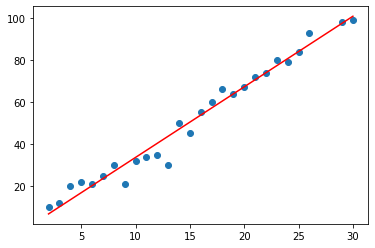

In [12]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],predictions, c='r')
plt.show()


## Regression multiple

In [14]:
df = pd.read_csv("Data_Regression/boston_house_prices.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
y = np.array(df["AGE"])
y = y.reshape(y.shape[0],1)
X = df.drop(columns=["AGE"])
print(X.shape,y.shape)

(506, 13) (506, 1)


In [16]:
X =  np.hstack((X,np.ones((X.shape[0],1))))
print(X.shape)

(506, 14)


In [17]:
theta = np.random.randn(14,1)
print(theta)

[[ 0.38755658]
 [-0.28340181]
 [ 1.58061788]
 [ 0.27338106]
 [ 0.71725528]
 [-0.10450832]
 [-0.83175738]
 [-0.76474646]
 [-1.20819701]
 [ 0.55260777]
 [-0.76819161]
 [-0.81904883]
 [-0.29843333]
 [-0.22511953]]


In [18]:
n_iterations = 20
learning_rate = 0.001
print(X.shape, y.shape, theta.shape)

(506, 14) (506, 1) (14, 1)


In [19]:
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)
print(theta_final)
predictions = model(X,theta_final)

[[-7.00541755e+47]
 [-1.57383708e+48]
 [-1.89071955e+48]
 [-1.07039548e+46]
 [-8.90983261e+46]
 [-9.78476857e+47]
 [-5.62405297e+47]
 [-1.73117378e+48]
 [-6.90869348e+49]
 [-2.92284598e+48]
 [-5.58706752e+49]
 [-2.08556208e+48]
 [-3.41931770e+48]
 [-1.56681963e+47]]


In [20]:
print(X.shape, y.shape)
print(predictions.shape)

(506, 14) (506, 1)
(506, 1)


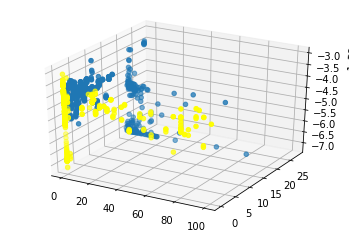

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
#for i in range(X.shape[1]):
ax.scatter(X[:,0],X[:,2],predictions)
ax.scatter(X[:,1],X[:,3],predictions,color = 'yellow')
plt.show()

## Regresion Polynomiale

In [22]:
df = pd.read_csv("Data_Regression/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


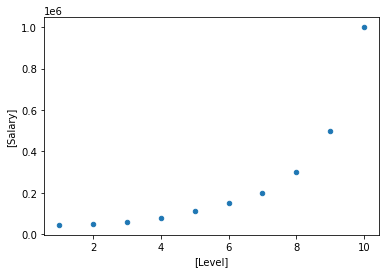

In [23]:
df.plot.scatter(['Level'], ['Salary'])

In [24]:
x = df["Level"]
y = df["Salary"]
x = df.iloc[:, 1:2].values.reshape(-1,1)
y = df.iloc[:, 2].values.reshape(-1,1)

X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2, X))
X = np.hstack((x**3, X))
X = np.hstack((x**4, X))
X = np.hstack((x**5, X))

theta = np.random.randn(6,1)
print(X.shape,y.shape)

(10, 6) (10, 1)


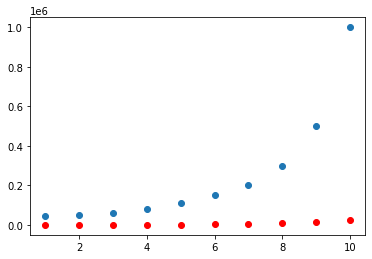

In [25]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], model(X, theta), c='r')

In [26]:
theta = np.random.randn(6,1)
n_iterations = 10000000
learning_rate = 0.0001

In [27]:
cost_function=(X,y,theta)

In [28]:
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)
print(theta_final)
predictions = model(X,theta_final)
print(theta)
print(learning_rate)
print(grad(X,y,theta))

TypeError: 'tuple' object is not callable

In [ ]:
print(X.shape, y.shape)
print(predictions.shape)

In [ ]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],predictions, c='r')

In [43]:
df =pd.read_csv('Data_Regression/Position_Salaries.csv')
df

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


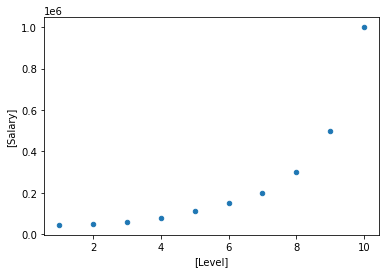

In [44]:
df.plot.scatter(['Level'], ['Salary'])

In [49]:
X = df['Level']
y = df['Salary']

x = df.iloc[:, 1:2].values.reshape(-1,1)
y = df.iloc[:, 2].values.reshape(-1,1)

X = X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2, X))
X = np.hstack((x**3, X))
X = np.hstack((x**4, X))
X = np.hstack((x**5, X))

print(X.shape)

theta = np.random.randn(6,1)

(10, 6)


In [60]:
def model(X, theta):
    return X.dot(theta)

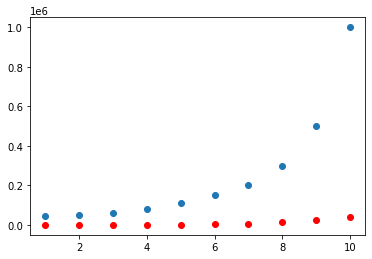

In [61]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], model(X, theta), c='r')

In [62]:
def cost_function(X,y, theta):
    m=len(y)
    return (1/2*m)*np.sum((model(X, theta)-y)**2)

In [63]:
cost_function(X,y,theta)

6571663020491.948

In [64]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X, theta)-y)

In [65]:
def gradient_descent(X,y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate*grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history
print(theta)
print(learning_rate)
print(grad(X,y,theta))

[[ 0.50117245]
 [-0.88443284]
 [-0.14071319]
 [ 0.15069834]
 [ 0.46685506]
 [ 1.95291856]]
9.5e-05
[[-1.38261827e+10]
 [-1.46402773e+09]
 [-1.57219097e+08]
 [-1.72428447e+07]
 [-1.96016045e+06]
 [-2.40705636e+05]]


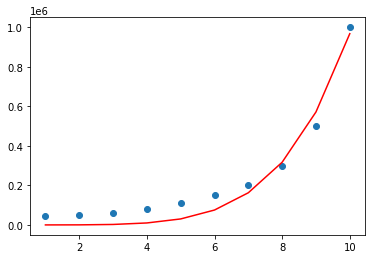

In [79]:
n_iterations = 10
learning_rate = 0.00000000095

theta_final, cost_history = gradient_descent(X,y,theta, learning_rate, n_iterations)

prediction = model(X,theta_final)
plt.scatter(x[:,0],y)
plt.plot(x[:,0],prediction,c='r')
plt.show()